# EJERCICIOS

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2024-12-17 18:19:46.382500: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## EJERCICIO 1

¿Cuántas neuronas hacen falta en la capa de salida para clasificar emails entre correo no deseado y correo deseado? 

¿Qué función de activación deberías usar en la capa de salida? 

Si, en cambio, quieres enfrentarte a MNIST, ¿cuántas neuronas necesitas en la capa de salida y qué función de activación deberías usar? 

¿Y si quieres que la red prediga los precios de la vivienda en California?

In [2]:
# 1- Al ser una clasificación binaria solo necesitamos una neurona con un umbral
# 2- Una función sigmoide dado a que nos ayuda a trabajar con probabilidades
# 3- Una por cada clase, teniendo 10 dígitos usaríamos 10 neuronas. Se usaría softmax como función
# de activación dado a que distribuiría las probabilidades de forma equitativa entre las 10 neuronas 
# de salida
# 4- Una neurona en la capa de salida y sin función de activación dado a que es una regresión


## EJERCICIO 2

Entrena un red neuronal profunda con el conjunto de datos MNIST (puedes cargarlo con tf. keras. datasets.minst.load_data()). Intenta conseguir la mejor pruebas en el conjunto de validación  ajustando los hiperparámetros de modo manual. Prueba a buscar una buena tasa de aprendizaje y utiliza la detención temprana (mínimo hay que conseguir un 97%).

Pasos a seguir: 
+ Entrena varios modelos con distintas tasas de aprendizaje
+ Guarda cada modelo en un fichero
+ Carga cada modelo y evalúalo en el conjunto de cargas y quedate con programación con el mejor (bucle que se quede con el mejor), mostrando la tasa de aprendizaje y la exactitud del mejor modelo.

Si no obtienes más de un 97% vuelve a empezar.

In [3]:
# Cargar los datos MNIST
(data_train, data_test) = tf.keras.datasets.mnist.load_data()

# Dividir los datos en imágenes y etiquetas
(x_train, y_train) = data_train  # Datos de entrenamiento
(x_test, y_test) = data_test     # Datos de prueba

# Dividir x_train y y_train para crear un conjunto de validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [4]:
# Aplanar las imágenes (28x28 -> 784)
x_train = x_train.reshape(-1, 28*28)
x_val = x_val.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Normalizar la escala de grises
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

# Construir el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28*28,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Definimos las tasas de aprendizaje
learning_rates = [1e-3,1e-2,0.1]

# Definimos la ruta de los checkpoints
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint( "Checkpoints/4_3_2.weights.h5", save_weights_only=True)

# Definimos que el modelo pare si en 10 iteraciones no mejora
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Variables finales inicializadas
best_acc = 0
best_lr = 0
best_model = 0

# Por cada valor de learning_rates...
for learning_rate in learning_rates:
    print(f"Entrenando con learning rate: {learning_rate}")
    # Se define el optimizador Adam con la tasa de aprendizaje
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Compilar el modelo
    model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, early_stopping_cb],
    )
    name = "/home/iabd/Documentos/Python_clase/SAPA/Ejercicios/modelos/4_3_2/"
    name += str(learning_rate)
    name += ".keras"
    print(name)
    model.save(name)

    test_loss, test_acc = model.evaluate(x_val, y_val)

    # Comparar valores
    if test_acc > best_acc:
        best_acc = test_acc
        best_lr = learning_rate
        best_model = model
print(f"El mejor learning rate es de {best_lr}, con una exactitud de {best_acc}")


Entrenando con learning rate: 0.001
Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8610 - loss: 0.4793 - val_accuracy: 0.9563 - val_loss: 0.1490
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9646 - loss: 0.1173 - val_accuracy: 0.9665 - val_loss: 0.1094
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9762 - loss: 0.0798 - val_accuracy: 0.9678 - val_loss: 0.1036
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9814 - loss: 0.0606 - val_accuracy: 0.9756 - val_loss: 0.0879
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9859 - loss: 0.0446 - val_accuracy: 0.9739 - val_loss: 0.0892
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0356 - val_accuracy: 0.9722 - val_loss: 0.1027
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9909 - loss: 0.0276 - val_accuracy: 0.9765 - val_loss: 0.0930
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2

## EJERCICIO 3

Clasificación de Imágenes de Dígitos Escritos a Mano:

* Objetivo: Entrenar una red neuronal para clasificar imágenes de dígitos escritos a mano utilizando el conjunto de datos SVHN (Street View House Numbers).

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos representando alguna imagen con su etiqueta y muestra los valores (únicos) de y (en el entrenamiento, en validación y en pruebas), preparar los datos (d normalizar dividiendo entre 255.0 e igual hay que hacer algo más), construir, compilar y entrenar una red neuronal. 

    * Utilizar detección temprana

    * Hacer una gráfica de como evoluciona accuracy y val_accuracy durante el entrenamiento

    * Si es necesario ajustar el modelo para lograr una mayor precisión.

    * Evalúar el modelo en el conjunto de test y hacer alguna predicción (representa alguna imagen con su etiqueta real y la predicha)

In [6]:
def load_svhn_data(url):
    path = tf.keras.utils.get_file("svhn.mat", url)
    data = loadmat(path)
    return np.transpose(data["X"], (3, 0, 1, 2)), data["y"].flatten()

# Cargar datos
train_url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
test_url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"
X_train_full, y_train_full = load_svhn_data(train_url)
X_test, y_test = load_svhn_data(test_url)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [17]:
import warnings
import matplotlib.pyplot as plt

def display_image(data,tag=""):
    """
    Muestra una única imagen utilizando plt.imshow.

    Parámetros:
    - data: Imagen en formato numpy array (32x32x3, por ejemplo).
    Opcionales:
    - tag: Etiqueta de la imagen con un str del número a adivinar.
    """
    plt.imshow(data)
    plt.axis('off')  # Ocultar los ejes
    if tag !="":
        plt.title(tag)
    plt.show()

def display_many(data, tags, x, y):
    """
    Muestra varias imágenes en una cuadrícula de tamaño x por y.

    Parámetros:
    - data: Array con imágenes (Number, Height, Width, Color)
    - tag: Array con etiquetas de las imágenes en formato str, que se correlacionen con data
    - x: Número de filas en la cuadrícula.
    - y: Número de columnas en la cuadrícula.

    Lanza:
    - IndexError: Si hay menos imágenes en el array que el número requerido (x * y).
    - ValueError: Si no coindiden la longitud de los datos con las etiquetas
    """
    if len(data) > x * y:
        warnings.warn(
            f"La cantidad de imágenes ({len(data)}) es superior a las dimensiones de la cuadrícula "
            f"({x}x{y} = {x*y}). No se mostrarán todas las imágenes.",
            UserWarning
        )
    if len(data) != len(tags):
        raise ValueError(
            f"La longitud de las imágenes ({len(data)}) no coincide con la longitud de las etiquetas ({len(tags)})"
        )
    
    if len(data) < x * y:
        raise IndexError(
            f"Las dimensiones proporcionadas de {x} x {y} requieren {x*y} imágenes, "
            f"pero solo se tienen {len(data)} imágenes."
        )

    # Crear una cuadrícula de subgráficos
    fig, axes = plt.subplots(x, y, figsize=(8, 8))  # Tamaño ajustado

    # Recorrer cada posición de la cuadrícula y mostrar una imagen
    for i, ax in enumerate(axes.flat):  # axes.flat aplana la matriz x, y
        ax.imshow(data[i])              # Mostrar la imagen en la posición i
        ax.axis('off')                  # Ocultar los ejes
        ax.set_title(tags[i])           # Número real

    # Ajustar el espaciado entre imágenes
    plt.tight_layout()
    plt.show()

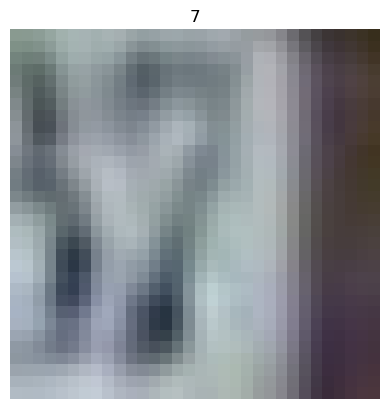

In [9]:
# Probamos la función
display_image(X_train[0],y_train[0])

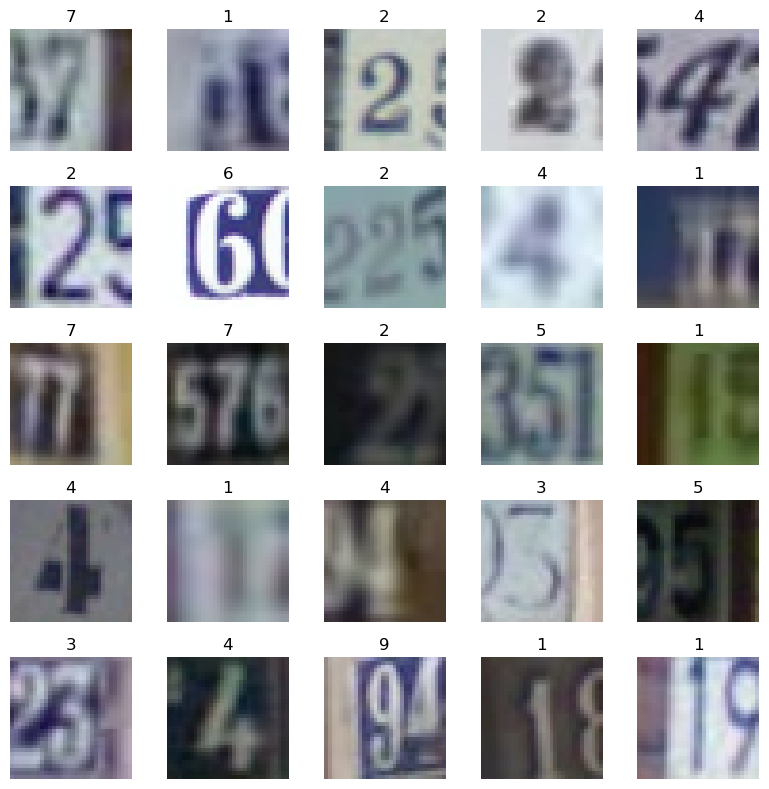

In [10]:
display_many(X_train[:25],y_train[:25],5,5)

In [11]:
# Sacar los valores únicos de y
valores_unicos, conteo = np.unique(y_train, return_counts=True)
# Convertir a DataFrame
df = pd.DataFrame({
    'Valor': valores_unicos,
    'Conteo': conteo
})
# Visualizar mejor
print(df)

   Valor  Conteo
0      1   11015
1      2    8452
2      3    6807
3      4    6018
4      5    5505
5      6    4574
6      7    4472
7      8    4031
8      9    3742
9     10    3989


In [12]:
# Hay gran cantidad de 1s y 2es y el 0 está mal nombrado como 10, vamos a correjir eso
y_train = np.where(y_train == 10, 0, y_train)
y_val = np.where(y_val == 10, 0, y_val)
y_test = np.where(y_test == 10, 0, y_test)

valores_unicos, conteo = np.unique(y_train, return_counts=True)
df = pd.DataFrame({
    'Valor': valores_unicos,
    'Conteo': conteo
})
print(df)

   Valor  Conteo
0      0    3989
1      1   11015
2      2    8452
3      3    6807
4      4    6018
5      5    5505
6      6    4574
7      7    4472
8      8    4031
9      9    3742


In [13]:
# Normalizamos los datos
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

print(X_train[0])

[[[0.5372549  0.60392157 0.56470588]
  [0.5372549  0.60392157 0.56862745]
  [0.54901961 0.61568627 0.58823529]
  ...
  [0.23921569 0.20392157 0.17254902]
  [0.23137255 0.19607843 0.14117647]
  [0.21568627 0.18039216 0.10980392]]

 [[0.49803922 0.56862745 0.52941176]
  [0.49019608 0.56078431 0.5254902 ]
  [0.50588235 0.57254902 0.54509804]
  ...
  [0.25490196 0.21568627 0.2       ]
  [0.24705882 0.20392157 0.16470588]
  [0.23137255 0.18823529 0.12156863]]

 [[0.45098039 0.51764706 0.49019608]
  [0.43137255 0.49803922 0.47058824]
  [0.43921569 0.49803922 0.47843137]
  ...
  [0.2745098  0.23529412 0.23137255]
  [0.27058824 0.22352941 0.19215686]
  [0.25490196 0.20392157 0.14901961]]

 ...

 [[0.60784314 0.64313725 0.67843137]
  [0.60784314 0.64705882 0.68235294]
  [0.60784314 0.64705882 0.68627451]
  ...
  [0.2627451  0.19607843 0.25882353]
  [0.2745098  0.20392157 0.25098039]
  [0.27843137 0.2        0.23921569]]

 [[0.65882353 0.69803922 0.73333333]
  [0.65882353 0.69803922 0.73333333]


Epoch 1/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.5237 - loss: 1.3970 - val_accuracy: 0.8574 - val_loss: 0.4751
Epoch 2/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8646 - loss: 0.4651 - val_accuracy: 0.8782 - val_loss: 0.4158
Epoch 3/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8871 - loss: 0.3857 - val_accuracy: 0.8795 - val_loss: 0.4074
Epoch 4/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9005 - loss: 0.3406 - val_accuracy: 0.8892 - val_loss: 0.3778
Epoch 5/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9102 - loss: 0.3062 - val_accuracy: 0.8907 - val_loss: 0.3826
Epoch 6/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9174 - loss: 0.2792 - val_accuracy: 0.8974 - val_loss: 0.3617
Epoch 7/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9244 - loss: 0.2546 - val_accuracy: 0.8969 - val_loss: 0.3642
Epoch 8/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 

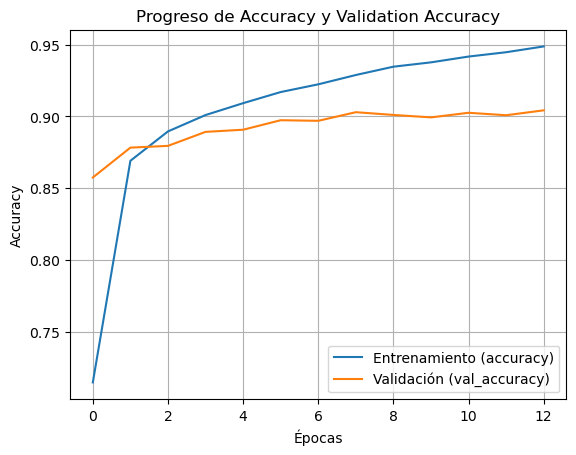

In [14]:
# Construir el modelo, una red densa da un acc de 0.18, GPT recomienda usar convolucionales
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definimos la ruta de los checkpoints
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint( "Checkpoints/4_3_3.weights.h5", save_weights_only=True)

# Definimos que el modelo pare si en 10 iteraciones no mejora
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
X_train,
y_train,
epochs=100,
validation_data=(X_val, y_val),
callbacks=[checkpoint_cb, early_stopping_cb],
)

# Graficar el progreso de la red neuronal

# Obtener los valores de accuracy y val_accuracy desde el history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Graficar el progreso de accuracy y val_accuracy
plt.plot(acc, label='Entrenamiento (accuracy)')
plt.plot(val_acc, label='Validación (val_accuracy)')
plt.title('Progreso de Accuracy y Validation Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [16]:
# El modelo parece ligeramente sobreajustado, vamos a evaluarlo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de test: {test_acc}")

2290/2290 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9317 - loss: 0.2388
Precisión en el conjunto de test: 0.9312283992767334


30763


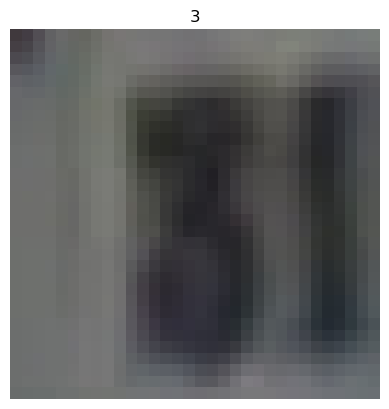

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicción de la clase: [3]


In [54]:
n = np.random.randint(0,len(X_test))
print(n)
display_image(X_test[n],y_test[n])
# Hacer la predicción
prediccion = model.predict(np.expand_dims(X_test[n], axis=0)) # Necesitamos un array (1,32,32,3), añadimos dimensión

# Si es una clasificación, probablemente querrás ver la clase con la mayor probabilidad
prediccion_clase = np.argmax(prediccion, axis=1)

print("Predicción de la clase:", prediccion_clase)

## EJERCICIO 4

Predicción del consumo de energía:

* Objetivo: Construir una red neuronal para predecir el consumo de energía de edificios a partir de características como la temperatura, humedad, y tiempo del conjunto de datos Energy Efficiency de UCI Machine Learning Repository

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos, preparar los datos (normalizar con una capa de normalización), construir un modelo de regresión, compilar y entrenar una red neuronal. 
    
    * Usa X1-X8 para la X e Y1-Y2 para la y

    * Ajusta el modelo hasta encontrar un error absoluto medio aceptable

    * Haz una gráfica de como evoluciona el error absoluto medio y error absoluto medio del conjunto de validación durante el entrenamiento

    * Evalúa el modelo en el conjunto de test y haz alguna predicción (muestra el valor predicho y el real)

In [15]:
# Descargar el conjunto de datos de eficiencia energética de UCI
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
data = pd.read_excel(url)

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.